# **Logistic Regression from Scratch**

In [1]:
#Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# reading the csv file, del 2 columns from the file, checking first few rows of the file
data = pd.read_csv('Social_Network_Ads.csv')
data.drop(columns=['User ID','Gender',],axis=1,inplace=True)
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
#Declare label as last column in the source file
y = data.iloc[:,-1].values

In [4]:
#Declaring X as all columns excluding last
X = data.iloc[:,:-1].values

In [6]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
# Sacaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Sigmoid Function**
This sigmoid function is reponsible for predicting or classifying a given input. Logistic function or sigmoid is defined as:  
Where:
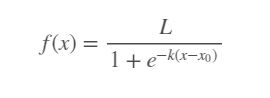

e = Euler's number which is 2.71828.  
x0 = the value of the sigmoid's midpoint on the x-axis.  
L = the maximum value.  
k = steepness of the curve.  

For Logistic Regression however here is the definition of the logistic function:    
Where:  
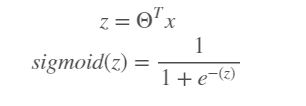
Θ = is the weight.

In [8]:
#Variabes to calculate sigmoid function
y_pred = []
len_x = len(X_train[0])
w = []
b = 0.2  #Bais
print(len_x)

2


In [9]:
entries = len(X_train[:,0])
entries

300

In [10]:
for weights in range(len_x):
    w.append(0)
w

[0, 0]

In [11]:
# Sigmoid function
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [12]:
def predict(inputs):
    z = np.dot(w,inputs)+b
    a = sigmoid(z)
    return a

# **Loss Function**

To start we pick random values and we need a way to measure how well the algorithm performs using those random weights. That measure is computed using the loss function.

The loss function is defined as:
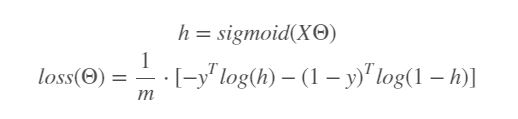

Where:  
 m = the number of samples  
 y = the target class

In [13]:
#Loss function
def loss_func(y,a):
    J = -(y*np.log(a) + (1-y)*np.log(1-a))
    return J

In [14]:
dw = []
db = 0
J = 0
alpha = 0.1 #Learning Rate
for x in range(len_x):
    dw.append(0)

# **Gradient Descent**

The goal is to minimize the loss by means of increasing or decreasing the weights, which is commonly called fitting. Which weights should be bigger and which should be smaller? This can be decided by a function called Gradient descent. The Gradient descent is just the derivative of the loss function with respect to its weights.

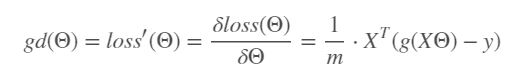

The weights are updated by substracting the derivative (gradient descent) times the learning rate, as defined below:

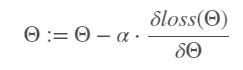

Where:  

α = learning rate (usually 0.1)

In [15]:
#Repeating this process 1000 times
epochs = 1000
for iterations in range(epochs):
    for i in range(entries):
        localx = X_train[i]
        a = predict(localx)   
        dz = a - y_train[i]
        J += loss_func(y_train[i],a)
        for j in range(len_x):
            dw[j] = dw[j]+(localx[j]*dz)
        db += dz
    J = J/entries
    db = db/entries
    for x in range(len_x):
        dw[x]=dw[x]/entries
    for x in range(len_x):
        w[x] = w[x]-(alpha*dw[x])
    b = b-(alpha*db)         
    J=0

In [16]:
#Print weight
print(w)

[2.2255967798023493, 1.191296482920891]


In [17]:
#print intercept
print(b)

-0.9884403792491633


In [18]:
#predicting the label
for x in range(len(y_test)):
    y_pred.append(predict(X_test[x]))

In [19]:
#print actual and predicted values in a table
for x in range(len(y_pred)):
    print('Actual ',y_test[x],' Predicted ',y_pred[x])
    if y_pred[x]>=0.5:
        y_pred[x]=1
    else:
        y_pred[x]=0

Actual  0  Predicted  0.10173957901916296
Actual  0  Predicted  0.15541379063749383
Actual  0  Predicted  0.18384857241488903
Actual  0  Predicted  0.07912036262040134
Actual  0  Predicted  0.08675047649964047
Actual  0  Predicted  0.00574648949617734
Actual  0  Predicted  0.011606945684409618
Actual  1  Predicted  0.7527138746162638
Actual  0  Predicted  0.004155480041646165
Actual  0  Predicted  0.5122778145635105
Actual  0  Predicted  0.029582541150851217
Actual  0  Predicted  0.023565655543652676
Actual  0  Predicted  0.14925396310879835
Actual  0  Predicted  0.3682375639324936
Actual  0  Predicted  0.011930655455900694
Actual  0  Predicted  0.33157969678699456
Actual  0  Predicted  0.2727733662729687
Actual  0  Predicted  0.009270658193881204
Actual  1  Predicted  0.9919762917091707
Actual  0  Predicted  0.034855150097174305
Actual  0  Predicted  0.07888516516136876
Actual  1  Predicted  0.9717389761934756
Actual  0  Predicted  0.26953193911503476
Actual  1  Predicted  0.899399114

In [20]:
# Calculating accuracy of prediction
count = 0
for x in range(len(y_pred)):
    if(y_pred[x]==y_test[x]):
        count=count+1
print('Accuracy:',(count/(len(y_pred)))*100)

Accuracy: 89.0


In [21]:
#Adding the code for confusion matrix which is the best model performace measure for Classification Algorithms
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]
